In [1]:
import mujoco
import mujoco.rollout as rollout
from mujoco import sysid
import numpy as np
import matplotlib.pyplot as plt
import mediapy as media
from absl import logging
import base64
from IPython.display import IFrame

logging.set_verbosity("INFO")

def display_report(report):
    html_b64 = base64.b64encode(report.build().encode()).decode()
    return IFrame(src=f"data:text/html;base64,{html_b64}", width="100%", height=800)

In [2]:
H1_2_XML_TEXT = """\n 
    <mujoco model="h1_2">
  <compiler angle="radian" meshdir="meshes/" autolimits="true"/>
  <option gravity="0 0 -9.81" timestep="0.002" integrator="implicitfast"/>

  <visual>
    <global offwidth="1920" offheight="1440"/>
    <rgba haze="0.7 0.78 0.88 1"/>
  </visual>

  <default>
    <joint damping="5" armature="0.1"  frictionloss="0.3" />
  </default>

  <asset>
    <texture type="skybox" builtin="gradient" rgb1="0.85 0.88 0.94" rgb2="0.6 0.65 0.78" width="512" height="512"/>
    <mesh name="pelvis" file="pelvis.STL"/>
    <mesh name="left_hip_yaw_link" file="left_hip_yaw_link.STL"/>
    <mesh name="left_hip_pitch_link" file="left_hip_pitch_link.STL"/>
    <mesh name="left_hip_roll_link" file="left_hip_roll_link.STL"/>
    <mesh name="left_knee_link" file="left_knee_link.STL"/>
    <mesh name="left_ankle_pitch_link" file="left_ankle_pitch_link.STL"/>
    <mesh name="left_ankle_roll_link" file="left_ankle_roll_link.STL"/>
    <mesh name="right_hip_yaw_link" file="right_hip_yaw_link.STL"/>
    <mesh name="right_hip_pitch_link" file="right_hip_pitch_link.STL"/>
    <mesh name="right_hip_roll_link" file="right_hip_roll_link.STL"/>
    <mesh name="right_knee_link" file="right_knee_link.STL"/>
    <mesh name="right_ankle_pitch_link" file="right_ankle_pitch_link.STL"/>
    <mesh name="right_ankle_roll_link" file="right_ankle_roll_link.STL"/>
    <mesh name="torso_link" file="torso_link.STL"/>
    <mesh name="left_shoulder_pitch_link" file="left_shoulder_pitch_link.STL"/>
    <mesh name="left_shoulder_roll_link" file="left_shoulder_roll_link.STL"/>
    <mesh name="left_shoulder_yaw_link" file="left_shoulder_yaw_link.STL"/>
    <mesh name="left_elbow_link" file="left_elbow_link.STL"/>
    <mesh name="left_wrist_roll_link" file="left_wrist_roll_link.STL"/>
    <mesh name="left_wrist_pitch_link" file="left_wrist_pitch_link.STL"/>
    <mesh name="wrist_yaw_link" file="wrist_yaw_link.STL"/>
    <mesh name="right_shoulder_pitch_link" file="right_shoulder_pitch_link.STL"/>
    <mesh name="right_shoulder_roll_link" file="right_shoulder_roll_link.STL"/>
    <mesh name="right_shoulder_yaw_link" file="right_shoulder_yaw_link.STL"/>
    <mesh name="right_elbow_link" file="right_elbow_link.STL"/>
    <mesh name="right_wrist_roll_link" file="right_wrist_roll_link.STL"/>
    <mesh name="right_wrist_pitch_link" file="right_wrist_pitch_link.STL"/>
    <mesh name="logo_link" file="logo_link.STL"/>
  </asset>

  <worldbody>
    <geom name="ground" type="plane" size="5 5 0.1" pos="0 0 0" rgba="0.25 0.45 0.85 1"/>
    <light name="sun" pos="0 0 3" dir="0 0 -1" diffuse="1 1 1" specular="0.5 0.5 0.5" directional="true"/>
    <!-- Head-on: camera in front of robot, tracks COM so robot stays in view -->
    <camera name="head_on" pos="3 0 1.3" xyaxes="0 1 0 0 0 1" fovy="45" mode="trackcom"/>
    <!-- Behind: camera behind robot ( -X ) looking toward +X at scene center -->
    <camera name="behind" pos="-3 0 1.3" xyaxes="0 -1 0 0 0 1"/>
    <!-- Right: camera on right side ( -Y ) looking at scene center -->
    <camera name="right" pos="0 -3 1.3" xyaxes="1 0 0 0 0 1"/>
    <!-- Left: camera on left side ( +Y ) looking at scene center -->
    <camera name="left" pos="0 3 1.3" xyaxes="-1 0 0 0 0 1"/>
    <body name="rope_pivot" pos="0 0 1.78">
      <joint name="rope_ball" type="ball"/>
      <geom name="rope" type="cylinder" size="0.015 0.25" pos="0 0 -0.25" rgba="0.35 0.3 0.25 1"/>
      <body name="pelvis" pos="0 0 -0.5">
      <inertial pos="-0.0004 3.7e-05 -0.046864" quat="0.497097 0.496809 -0.503132 0.502925" mass="5.983" diaginertia="0.0531565 0.0491678 0.00902583"/>
      <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="pelvis"/>
      <geom size="0.05" rgba="0.1 0.1 0.1 1"/>
      <body name="left_hip_yaw_link" pos="0 0.0875 -0.1632">
        <inertial pos="0 -0.026197 0.006647" quat="0.704899 -0.0553755 0.0548434 0.705013" mass="2.829" diaginertia="0.00574303 0.00455361 0.00349461"/>
        <joint name="left_hip_yaw_joint" pos="0 0 0" axis="0 0 1" range="-0.43 0.43" actuatorfrcrange="-200 200"/>
        <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_hip_yaw_link"/>
        <body name="left_hip_pitch_link" pos="0 0.0755 0">
          <inertial pos="-0.00781 -0.004724 -6.3e-05" quat="0.701575 0.711394 0.0330266 0.0249149" mass="2.92" diaginertia="0.00560661 0.00445055 0.00385068"/>
          <joint name="left_hip_pitch_joint" pos="0 0 0" axis="0 1 0" range="-3.14 2.5" actuatorfrcrange="-200 200"/>
          <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_hip_pitch_link"/>
          <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_hip_pitch_link"/>
          <body name="left_hip_roll_link">
            <inertial pos="0.004171 -0.008576 -0.194509" quat="0.634842 0.0146079 0.0074063 0.772469" mass="4.962" diaginertia="0.0480229 0.0462788 0.00887409"/>
            <joint name="left_hip_roll_joint" pos="0 0 0" axis="1 0 0" range="-0.43 3.14" actuatorfrcrange="-200 200"/>
            <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_hip_roll_link"/>
            <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_hip_roll_link"/>
            <body name="left_knee_link" pos="0 0 -0.4">
              <inertial pos="0.000179 0.000121 -0.168936" quat="0.416585 0.0104983 0.00514003 0.909021" mass="3.839" diaginertia="0.0391044 0.038959 0.00501125"/>
              <joint name="left_knee_joint" pos="0 0 0" axis="0 1 0" range="-0.12 2.19" actuatorfrcrange="-300 300"/>
              <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_knee_link"/>
              <geom size="0.04 0.1" pos="0 0 -0.2" type="cylinder" rgba="0.1 0.1 0.1 1"/>
              <body name="left_ankle_pitch_link" pos="0 0 -0.4">
                <inertial pos="-0.000294 0 -0.010794" quat="0.999984 0 -0.00574445 0" mass="0.102" diaginertia="2.39454e-05 2.1837e-05 1.34126e-05"/>
                <joint name="left_ankle_pitch_joint" pos="0 0 0" axis="0 1 0" range="-0.897334 0.523598" actuatorfrcrange="-60 60"/>
                <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_ankle_pitch_link"/>
                <body name="left_ankle_roll_link" pos="0 0 -0.02">
                  <inertial pos="0.029589 0 -0.015973" quat="0 0.725858 0 0.687845" mass="0.747" diaginertia="0.00359178 0.00343534 0.000640307"/>
                  <joint name="left_ankle_roll_joint" pos="0 0 0" axis="1 0 0" range="-0.261799 0.261799" actuatorfrcrange="-40 40"/>
                  <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_ankle_roll_link"/>
                  <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_ankle_roll_link"/>
                </body>
              </body>
            </body>
          </body>
        </body>
      </body>
      <body name="right_hip_yaw_link" pos="0 -0.0875 -0.1632">
        <inertial pos="0 0.026197 0.006647" quat="0.705013 0.0548434 -0.0553755 0.704899" mass="2.829" diaginertia="0.00574303 0.00455361 0.00349461"/>
        <joint name="right_hip_yaw_joint" pos="0 0 0" axis="0 0 1" range="-0.43 0.43" actuatorfrcrange="-200 200"/>
        <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_hip_yaw_link"/>
        <body name="right_hip_pitch_link" pos="0 -0.0755 0">
          <inertial pos="-0.00781 0.004724 -6.3e-05" quat="0.711394 0.701575 -0.0249149 -0.0330266" mass="2.92" diaginertia="0.00560661 0.00445055 0.00385068"/>
          <joint name="right_hip_pitch_joint" pos="0 0 0" axis="0 1 0" range="-3.14 2.5" actuatorfrcrange="-200 200"/>
          <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_hip_pitch_link"/>
          <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_hip_pitch_link"/>
          <body name="right_hip_roll_link">
            <inertial pos="0.004171 0.008576 -0.194509" quat="0.772469 0.0074063 0.0146079 0.634842" mass="4.962" diaginertia="0.0480229 0.0462788 0.00887409"/>
            <joint name="right_hip_roll_joint" pos="0 0 0" axis="1 0 0" range="-3.14 0.43" actuatorfrcrange="-200 200"/>
            <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_hip_roll_link"/>
            <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_hip_roll_link"/>
            <body name="right_knee_link" pos="0 0 -0.4">
              <inertial pos="0.000179 -0.000121 -0.168936" quat="0.909021 0.00514003 0.0104983 0.416585" mass="3.839" diaginertia="0.0391044 0.038959 0.00501125"/>
              <joint name="right_knee_joint" pos="0 0 0" axis="0 1 0" range="-0.12 2.19" actuatorfrcrange="-300 300"/>
              <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_knee_link"/>
              <geom size="0.04 0.1" pos="0 0 -0.2" type="cylinder" rgba="0.1 0.1 0.1 1"/>
              <body name="right_ankle_pitch_link" pos="0 0 -0.4">
                <inertial pos="-0.000294 0 -0.010794" quat="0.999984 0 -0.00574445 0" mass="0.102" diaginertia="2.39454e-05 2.1837e-05 1.34126e-05"/>
                <joint name="right_ankle_pitch_joint" pos="0 0 0" axis="0 1 0" range="-0.897334 0.523598" actuatorfrcrange="-60 60"/>
                <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_ankle_pitch_link"/>
                <body name="right_ankle_roll_link" pos="0 0 -0.02">
                  <inertial pos="0.029589 0 -0.015973" quat="0 0.725858 0 0.687845" mass="0.747" diaginertia="0.00359178 0.00343534 0.000640307"/>
                  <joint name="right_ankle_roll_joint" pos="0 0 0" axis="1 0 0" range="-0.261799 0.261799" actuatorfrcrange="-40 40"/>
                  <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_ankle_roll_link"/>
                  <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_ankle_roll_link"/>
                </body>
              </body>
            </body>
          </body>
        </body>
      </body>
      <body name="torso_link">
        <inertial pos="0.000489 0.002797 0.20484" quat="0.999989 -0.00130808 -0.00282289 -0.00349105" mass="17.789" diaginertia="0.487315 0.409628 0.127837"/>
        <joint name="torso_joint" pos="0 0 0" axis="0 0 1" range="-2.35 2.35" ref="0" actuatorfrcrange="-200 200"/>
        <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="torso_link"/>
        <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="torso_link"/>
        <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="1 1 1 1" mesh="logo_link"/>
        <site name="imu" size="0.01" pos="-0.04452 -0.01891 0.27756"/>
        <body name="left_shoulder_pitch_link" pos="0 0.14806 0.42333" quat="0.991445 0.130526 0 0">
          <inertial pos="0.003053 0.06042 -0.0059" quat="0.761799 0.645681 -0.0378496 -0.0363943" mass="1.327" diaginertia="0.000588757 0.00053309 0.000393023"/>
          <joint name="left_shoulder_pitch_joint" pos="0 0 0" axis="0 1 0" range="-3.14 1.57" actuatorfrcrange="-40 40"/>
          <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_pitch_link"/>
          <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_pitch_link"/>
          <body name="left_shoulder_roll_link" pos="0.0342 0.061999 -0.0060011" quat="0.991445 -0.130526 0 0">
            <inertial pos="-0.030932 -1e-06 -0.10609" quat="0.986055 0.000456937 0.166408 0.00213553" mass="1.393" diaginertia="0.00200869 0.00193464 0.000449847"/>
            <joint name="left_shoulder_roll_joint" pos="0 0 0" axis="1 0 0" range="-0.38 3.4" actuatorfrcrange="-40 40"/>
            <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_roll_link"/>
            <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_roll_link"/>
            <body name="left_shoulder_yaw_link" pos="-0.0342 0 -0.1456">
              <inertial pos="0.004583 0.001128 -0.001128" quat="0.663644 -0.0108866 -0.0267235 0.747492" mass="1.505" diaginertia="0.00431782 0.00420697 0.000645658"/>
              <joint name="left_shoulder_yaw_joint" pos="0 0 0" axis="0 0 1" range="-2.66 3.01" actuatorfrcrange="-18 18"/>
              <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_yaw_link"/>
              <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_shoulder_yaw_link"/>
              <body name="left_elbow_link" pos="0.006 0.0329 -0.182">
                <inertial pos="0.077092 -0.028751 -0.009714" quat="0.544921 0.610781 0.423352 0.388305" mass="0.691" diaginertia="0.000942091 0.000905273 0.00023025"/>
                <joint name="left_elbow_joint" pos="0 0 0" axis="0 1 0" range="-0.95 3.18" actuatorfrcrange="-18 18"/>
                <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_elbow_link"/>
                <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_elbow_link"/>
                <body name="left_wrist_roll_link" pos="0.121 -0.0329 -0.011">
                  <inertial pos="0.035281 -0.00232 0.000337" quat="0.334998 0.622198 -0.240131 0.66557" mass="0.683" diaginertia="0.00034681 0.000328248 0.000294628"/>
                  <joint name="left_wrist_roll_joint" pos="0 0 0" axis="1 0 0" range="-3.01 2.75" actuatorfrcrange="-19 19"/>
                  <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_wrist_roll_link"/>
                  <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_wrist_roll_link"/>
                  <body name="left_wrist_pitch_link" pos="0.087 0 0">
                    <inertial pos="0.020395 3.6e-05 -0.002973" quat="0.915893 -0.228405 -0.327262 -0.0432527" mass="0.484" diaginertia="7.25675e-05 7.00325e-05 6.9381e-05"/>
                    <joint name="left_wrist_pitch_joint" pos="0 0 0" axis="0 1 0" range="-0.4625 0.4625" actuatorfrcrange="-19 19"/>
                    <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="left_wrist_pitch_link"/>
                    <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="left_wrist_pitch_link"/>
                    <body name="left_wrist_yaw_link" pos="0.02 0 0">
                      <inertial pos="0.027967 9.6e-05 0.000739" quat="0.704961 -0.0198461 -0.019614 0.708697" mass="0.124" diaginertia="0.000169999 0.000137463 8.46436e-05"/>
                      <joint name="left_wrist_yaw_joint" pos="0 0 0" axis="0 0 1" range="-1.27 1.27" actuatorfrcrange="-19 19"/>
                      <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="wrist_yaw_link"/>
                    </body>
                  </body>
                </body>
              </body>
            </body>
          </body>
        </body>
        <body name="right_shoulder_pitch_link" pos="0 -0.14806 0.42333" quat="0.991445 -0.130526 0 0">
          <inertial pos="0.003053 -0.06042 -0.0059" quat="0.645681 0.761799 0.0363943 0.0378496" mass="1.327" diaginertia="0.000588757 0.00053309 0.000393023"/>
          <joint name="right_shoulder_pitch_joint" pos="0 0 0" axis="0 1 0" range="-3.14 1.57" actuatorfrcrange="-40 40"/>
          <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_pitch_link"/>
          <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_pitch_link"/>
          <body name="right_shoulder_roll_link" pos="0.0342 -0.061999 -0.0060011" quat="0.991445 0.130526 0 0">
            <inertial pos="-0.030932 1e-06 -0.10609" quat="0.986055 -0.000456937 0.166408 -0.00213553" mass="1.393" diaginertia="0.00200869 0.00193464 0.000449847"/>
            <joint name="right_shoulder_roll_joint" pos="0 0 0" axis="1 0 0" range="-3.4 0.38" actuatorfrcrange="-40 40"/>
            <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_roll_link"/>
            <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_roll_link"/>
            <body name="right_shoulder_yaw_link" pos="-0.0342 0 -0.1456">
              <inertial pos="0.004583 -0.001128 -0.001128" quat="0.747492 -0.0267235 -0.0108866 0.663644" mass="1.505" diaginertia="0.00431782 0.00420697 0.000645658"/>
              <joint name="right_shoulder_yaw_joint" pos="0 0 0" axis="0 0 1" range="-3.01 2.66" actuatorfrcrange="-18 18"/>
              <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_yaw_link"/>
              <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_shoulder_yaw_link"/>
              <body name="right_elbow_link" pos="0.006 -0.0329 -0.182">
                <inertial pos="0.077092 0.028751 -0.009714" quat="0.388305 0.423352 0.610781 0.544921" mass="0.691" diaginertia="0.000942091 0.000905273 0.00023025"/>
                <joint name="right_elbow_joint" pos="0 0 0" axis="0 1 0" range="-0.95 3.18" actuatorfrcrange="-18 18"/>
                <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_elbow_link"/>
                <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_elbow_link"/>
                <body name="right_wrist_roll_link" pos="0.121 0.0329 -0.011">
                  <inertial pos="0.035281 -0.00232 0.000337" quat="0.334998 0.622198 -0.240131 0.66557" mass="0.683" diaginertia="0.00034681 0.000328248 0.000294628"/>
                  <joint name="right_wrist_roll_joint" pos="0 0 0" axis="1 0 0" range="-2.75 3.01" actuatorfrcrange="-19 19"/>
                  <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_wrist_roll_link"/>
                  <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_wrist_roll_link"/>
                  <body name="right_wrist_pitch_link" pos="0.087 0 0">
                    <inertial pos="0.020395 3.6e-05 -0.002973" quat="0.915893 -0.228405 -0.327262 -0.0432527" mass="0.484" diaginertia="7.25675e-05 7.00325e-05 6.9381e-05"/>
                    <joint name="right_wrist_pitch_joint" pos="0 0 0" axis="0 1 0" range="-0.4625 0.4625" actuatorfrcrange="-19 19"/>
                    <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="right_wrist_pitch_link"/>
                    <geom type="mesh" rgba="0.1 0.1 0.1 1" mesh="right_wrist_pitch_link"/>
                    <body name="right_wrist_yaw_link" pos="0.02 0 0">
                      <inertial pos="0.027967 -9.6e-05 0.000739" quat="0.708697 -0.019614 -0.0198461 0.704961" mass="0.124" diaginertia="0.000169999 0.000137463 8.46436e-05"/>
                      <joint name="right_wrist_yaw_joint" pos="0 0 0" axis="0 0 1" range="-1.27 1.27" actuatorfrcrange="-19 19"/>
                      <geom type="mesh" contype="0" conaffinity="0" group="1" density="0" rgba="0.1 0.1 0.1 1" mesh="wrist_yaw_link"/>
                    </body>
                  </body>
                </body>
              </body>
            </body>
          </body>
        </body>
      </body>
    </body>
    </body>
  </worldbody>

  <actuator>
    <!-- Position servos (MuJoCo position actuator: force = kp*(ctrl-q) - kv*qvel) -->
    <!-- Legs: kp=100, kv=3 -->
    <position name="left_hip_yaw_joint" joint="left_hip_yaw_joint" kp="100" kv="3" ctrlrange="-0.43 0.43" forcerange="-200 200"/>
    <position name="left_hip_pitch_joint" joint="left_hip_pitch_joint" kp="100" kv="3" ctrlrange="-3.14 2.5" forcerange="-200 200"/>
    <position name="left_hip_roll_joint" joint="left_hip_roll_joint" kp="100" kv="3" ctrlrange="-0.43 3.14" forcerange="-200 200"/>
    <position name="left_knee_joint" joint="left_knee_joint" kp="100" kv="3" ctrlrange="-0.12 2.19" forcerange="-300 300"/>
    <position name="left_ankle_pitch_joint" joint="left_ankle_pitch_joint" kp="100" kv="3" ctrlrange="-0.897334 0.523598" forcerange="-60 60"/>
    <position name="left_ankle_roll_joint" joint="left_ankle_roll_joint" kp="100" kv="3" ctrlrange="-0.261799 0.261799" forcerange="-40 40"/>
    <position name="right_hip_yaw_joint" joint="right_hip_yaw_joint" kp="100" kv="3" ctrlrange="-0.43 0.43" forcerange="-200 200"/>
    <position name="right_hip_pitch_joint" joint="right_hip_pitch_joint" kp="100" kv="3" ctrlrange="-3.14 2.5" forcerange="-200 200"/>
    <position name="right_hip_roll_joint" joint="right_hip_roll_joint" kp="100" kv="3" ctrlrange="-3.14 0.43" forcerange="-200 200"/>
    <position name="right_knee_joint" joint="right_knee_joint" kp="100" kv="3" ctrlrange="-0.12 2.19" forcerange="-300 300"/>
    <position name="right_ankle_pitch_joint" joint="right_ankle_pitch_joint" kp="100" kv="3" ctrlrange="-0.897334 0.523598" forcerange="-60 60"/>
    <position name="right_ankle_roll_joint" joint="right_ankle_roll_joint" kp="100" kv="3" ctrlrange="-0.261799 0.261799" forcerange="-40 40"/>
    <position name="torso_joint" joint="torso_joint" kp="80" kv="3" ctrlrange="-2.35 2.35" forcerange="-200 200"/>
    <position name="left_shoulder_pitch_joint" joint="left_shoulder_pitch_joint" kp="60" kv="3" ctrlrange="-3.14 1.57" forcerange="-40 40"/>
    <position name="left_shoulder_roll_joint" joint="left_shoulder_roll_joint" kp="60" kv="3" ctrlrange="-0.38 3.4" forcerange="-40 40"/>
    <position name="left_shoulder_yaw_joint" joint="left_shoulder_yaw_joint" kp="60" kv="3" ctrlrange="-2.66 3.01" forcerange="-18 18"/>
    <position name="left_elbow_joint" joint="left_elbow_joint" kp="60" kv="3" ctrlrange="-0.95 3.18" forcerange="-18 18"/>
    <position name="left_wrist_roll_joint" joint="left_wrist_roll_joint" kp="60" kv="3" ctrlrange="-3.01 2.75" forcerange="-19 19"/>
    <position name="left_wrist_pitch_joint" joint="left_wrist_pitch_joint" kp="60" kv="3" ctrlrange="-0.4625 0.4625" forcerange="-19 19"/>
    <position name="left_wrist_yaw_joint" joint="left_wrist_yaw_joint" kp="60" kv="3" ctrlrange="-1.27 1.27" forcerange="-19 19"/>
    <position name="right_shoulder_pitch_joint" joint="right_shoulder_pitch_joint" kp="60" kv="3" ctrlrange="-3.14 1.57" forcerange="-40 40"/>
    <position name="right_shoulder_roll_joint" joint="right_shoulder_roll_joint" kp="60" kv="3" ctrlrange="-3.4 0.38" forcerange="-40 40"/>
    <position name="right_shoulder_yaw_joint" joint="right_shoulder_yaw_joint" kp="60" kv="3" ctrlrange="-2.66 3.01" forcerange="-18 18"/>
    <position name="right_elbow_joint" joint="right_elbow_joint" kp="60" kv="3" ctrlrange="-0.95 3.18" forcerange="-18 18"/>
    <position name="right_wrist_roll_joint" joint="right_wrist_roll_joint" kp="60" kv="3" ctrlrange="-3.01 2.75" forcerange="-19 19"/>
    <position name="right_wrist_pitch_joint" joint="right_wrist_pitch_joint" kp="60" kv="3" ctrlrange="-0.4625 0.4625" forcerange="-19 19"/>
    <position name="right_wrist_yaw_joint" joint="right_wrist_yaw_joint" kp="60" kv="3" ctrlrange="-1.27 1.27" forcerange="-19 19"/>
  </actuator>

  <sensor>
    <jointpos name="left_hip_yaw_pos" joint="left_hip_yaw_joint" />
    <jointpos name="left_hip_pitch_pos" joint="left_hip_pitch_joint" />
    <jointpos name="left_hip_roll_pos" joint="left_hip_roll_joint" />
    <jointpos name="left_knee_pos" joint="left_knee_joint" />
    <jointpos name="left_ankle_pitch_pos" joint="left_ankle_pitch_joint" />
    <jointpos name="left_ankle_roll_pos" joint="left_ankle_roll_joint" />
    <jointpos name="right_hip_yaw_pos" joint="right_hip_yaw_joint" />
    <jointpos name="right_hip_pitch_pos" joint="right_hip_pitch_joint" />
    <jointpos name="right_hip_roll_pos" joint="right_hip_roll_joint" />
    <jointpos name="right_knee_pos" joint="right_knee_joint" />
    <jointpos name="right_ankle_pitch_pos" joint="right_ankle_pitch_joint" />
    <jointpos name="right_ankle_roll_pos" joint="right_ankle_roll_joint" />
    <jointpos name="torso_joint_pos" joint="torso_joint" />
    <jointpos name="left_shoulder_pitch_pos" joint="left_shoulder_pitch_joint" />
    <jointpos name="left_shoulder_roll_pos" joint="left_shoulder_roll_joint" />
    <jointpos name="left_shoulder_yaw_pos" joint="left_shoulder_yaw_joint" />
    <jointpos name="left_elbow_pos" joint="left_elbow_joint" />
    <jointpos name="left_wrist_roll_pos" joint="left_wrist_roll_joint" />
    <jointpos name="left_wrist_pitch_pos" joint="left_wrist_pitch_joint" />
    <jointpos name="left_wrist_yaw_pos" joint="left_wrist_yaw_joint" />
    <jointpos name="right_shoulder_pitch_pos" joint="right_shoulder_pitch_joint" />
    <jointpos name="right_shoulder_roll_pos" joint="right_shoulder_roll_joint" />
    <jointpos name="right_shoulder_yaw_pos" joint="right_shoulder_yaw_joint" />
    <jointpos name="right_elbow_pos" joint="right_elbow_joint" />
    <jointpos name="right_wrist_roll_pos" joint="right_wrist_roll_joint" />
    <jointpos name="right_wrist_pitch_pos" joint="right_wrist_pitch_joint" />
    <jointpos name="right_wrist_yaw_pos" joint="right_wrist_yaw_joint" />

    <jointvel name="left_hip_yaw_vel" joint="left_hip_yaw_joint" />
    <jointvel name="left_hip_pitch_vel" joint="left_hip_pitch_joint" />
    <jointvel name="left_hip_roll_vel" joint="left_hip_roll_joint" />
    <jointvel name="left_knee_vel" joint="left_knee_joint" />
    <jointvel name="left_ankle_pitch_vel" joint="left_ankle_pitch_joint" />
    <jointvel name="left_ankle_roll_vel" joint="left_ankle_roll_joint" />
    <jointvel name="right_hip_yaw_vel" joint="right_hip_yaw_joint" />
    <jointvel name="right_hip_pitch_vel" joint="right_hip_pitch_joint" />
    <jointvel name="right_hip_roll_vel" joint="right_hip_roll_joint" />
    <jointvel name="right_knee_vel" joint="right_knee_joint" />
    <jointvel name="right_ankle_pitch_vel" joint="right_ankle_pitch_joint" />
    <jointvel name="right_ankle_roll_vel" joint="right_ankle_roll_joint" />
    <jointvel name="torso_joint_vel" joint="torso_joint" />
    <jointvel name="left_shoulder_pitch_vel" joint="left_shoulder_pitch_joint" />
    <jointvel name="left_shoulder_roll_vel" joint="left_shoulder_roll_joint" />
    <jointvel name="left_shoulder_yaw_vel" joint="left_shoulder_yaw_joint" />
    <jointvel name="left_elbow_vel" joint="left_elbow_joint" />
    <jointvel name="left_wrist_roll_vel" joint="left_wrist_roll_joint" />
    <jointvel name="left_wrist_pitch_vel" joint="left_wrist_pitch_joint" />
    <jointvel name="left_wrist_yaw_vel" joint="left_wrist_yaw_joint" />
    <jointvel name="right_shoulder_pitch_vel" joint="right_shoulder_pitch_joint" />
    <jointvel name="right_shoulder_roll_vel" joint="right_shoulder_roll_joint" />
    <jointvel name="right_shoulder_yaw_vel" joint="right_shoulder_yaw_joint" />
    <jointvel name="right_elbow_vel" joint="right_elbow_joint" />
    <jointvel name="right_wrist_roll_vel" joint="right_wrist_roll_joint" />
    <jointvel name="right_wrist_pitch_vel" joint="right_wrist_pitch_joint" />
    <jointvel name="right_wrist_yaw_vel" joint="right_wrist_yaw_joint" />

    <jointactuatorfrc name="left_hip_yaw_torque" joint="left_hip_yaw_joint" />
    <jointactuatorfrc name="left_hip_pitch_torque" joint="left_hip_pitch_joint" />
    <jointactuatorfrc name="left_hip_roll_torque" joint="left_hip_roll_joint" />
    <jointactuatorfrc name="left_knee_torque" joint="left_knee_joint" />
    <jointactuatorfrc name="left_ankle_pitch_torque" joint="left_ankle_pitch_joint" />
    <jointactuatorfrc name="left_ankle_roll_torque" joint="left_ankle_roll_joint" />
    <jointactuatorfrc name="right_hip_pitch_torque" joint="right_hip_pitch_joint" />
    <jointactuatorfrc name="right_hip_roll_torque" joint="right_hip_roll_joint" />
    <jointactuatorfrc name="right_hip_yaw_torque" joint="right_hip_yaw_joint" />
    <jointactuatorfrc name="right_knee_torque" joint="right_knee_joint" />
    <jointactuatorfrc name="right_ankle_pitch_torque" joint="right_ankle_pitch_joint" />
    <jointactuatorfrc name="right_ankle_roll_torque" joint="right_ankle_roll_joint" />
    <jointactuatorfrc name="torso_joint_torque" joint="torso_joint" />
    <jointactuatorfrc name="left_shoulder_yaw_torque" joint="left_shoulder_yaw_joint" />
    <jointactuatorfrc name="left_shoulder_pitch_torque" joint="left_shoulder_pitch_joint" />
    <jointactuatorfrc name="left_shoulder_roll_torque" joint="left_shoulder_roll_joint" />
    <jointactuatorfrc name="left_elbow_torque" joint="left_elbow_joint" />
    <jointactuatorfrc name="left_wrist_roll_torque" joint="left_wrist_roll_joint" />
    <jointactuatorfrc name="left_wrist_pitch_torque" joint="left_wrist_pitch_joint" />
    <jointactuatorfrc name="left_wrist_yaw_torque" joint="left_wrist_yaw_joint" />
    <jointactuatorfrc name="right_shoulder_pitch_torque" joint="right_shoulder_pitch_joint" />
    <jointactuatorfrc name="right_shoulder_roll_torque" joint="right_shoulder_roll_joint" />
    <jointactuatorfrc name="right_shoulder_yaw_torque" joint="right_shoulder_yaw_joint" />
    <jointactuatorfrc name="right_elbow_torque" joint="right_elbow_joint" />
    <jointactuatorfrc name="right_wrist_roll_torque" joint="right_wrist_roll_joint" />
    <jointactuatorfrc name="right_wrist_pitch_torque" joint="right_wrist_pitch_joint" />
    <jointactuatorfrc name="right_wrist_yaw_torque" joint="right_wrist_yaw_joint" />

    <framequat name="imu_quat" objtype="site" objname="imu" />
    <gyro name="imu_gyro" site="imu" />
    <accelerometer name="imu_acc" site="imu" />

    <framepos name="frame_pos" objtype="site" objname="imu" />
    <framelinvel name="frame_vel" objtype="site" objname="imu" />
  </sensor>
</mujoco>

"""

In [3]:
USE_REAL_DATA = True  # Toggle: False = synthetic (fake), True = real robot data from data/

H1_2_XML = H1_2_XML_TEXT
spec = mujoco.MjSpec.from_string(H1_2_XML)
model = spec.compile()
data = mujoco.MjData(model)

actuator_names = [model.actuator(i).name for i in range(model.nu)]
print("Available actuators:", actuator_names)

# Verify actuators are position servos (kp-style; not direct torque motors)
act0 = model.actuator(0)
assert act0.gainprm[0] != 0, (
    "Actuators look like <motor> — re-run the XML cell above!"
)
print(f"Actuator type check OK: gainprm[0]={act0.gainprm[0]}, biasprm={act0.biasprm[:3]}")

# --- Choose which joint to excite (matches data_collect.py single-joint protocol) ---
if USE_REAL_DATA:
    joints_to_control = ["right_knee_joint"]  # Real data is RightKnee
else:
    joints_to_control = ["left_knee_joint"]
controlled_mask = np.array([name in joints_to_control for name in actuator_names])
print("Controlling", controlled_mask.sum(), "actuators:", joints_to_control)
print("Data source:", "REAL robot" if USE_REAL_DATA else "SYNTHETIC (fake)")

if not USE_REAL_DATA:
    # ========== SYNTHETIC (fake) path ==========
    # Compute JOINT_BASE as midpoint of each joint's actual range from the compiled model.
    # This avoids mismatches between data_collect.py limits and MuJoCo XML limits.
    JOINT_BASE_BY_ACT = {}
    for act_i in range(model.nu):
        jnt_name = model.actuator(act_i).name
        j_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_JOINT, jnt_name)
        lo, hi = model.jnt_range[j_id]
        JOINT_BASE_BY_ACT[act_i] = float((lo + hi) / 2.0)
    print("JOINT_BASE_BY_ACT (midpoints of XML joint ranges):")
    for i, name in enumerate(actuator_names):
        j_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_JOINT, name)
        lo, hi = model.jnt_range[j_id]
        print(f"  {i:2d} {name:35s} range=[{lo:+.3f}, {hi:+.3f}]  mid={JOINT_BASE_BY_ACT[i]:+.4f}")

    def chirp_signal(t, amplitude, f_start, f_end, duration):
        """Linear chirp position offset matching data_collect.py chirp_trajectory."""
        k = (f_end - f_start) / duration
        phase = 2 * np.pi * (f_start * t + 0.5 * k * t**2)
        ramp = np.minimum(t / 0.5, 1.0)
        return amplitude * ramp * np.sin(phase)

    excited_act_idx = actuator_names.index(joints_to_control[0])
    base_pos = JOINT_BASE_BY_ACT[excited_act_idx]

    # Duration and timestep matching data_collect.py (500 Hz, 20s excitation)
    duration = 20.0
    n_steps = int(duration / model.opt.timestep)
    t = np.arange(n_steps) * model.opt.timestep

    # ctrl is position targets (general PD actuators). Non-excited joints held at 0
    # (matching data_collect.py), excited joint gets JOINT_BASE + chirp.
    # Trajectory 1: default chirp 0.2 -> 5.0 Hz, amp=0.2 (data_collect.py defaults)
    ctrl = np.zeros((n_steps, model.nu))
    ctrl[:, excited_act_idx] = base_pos + chirp_signal(t, 0.2, 0.2, 5.0, duration)
    ctrl2 = np.zeros((n_steps, model.nu))
    ctrl2[:, excited_act_idx] = base_pos + chirp_signal(t, 0.15, 0.5, 8.0, duration)
    ctrl3 = np.zeros((n_steps, model.nu))
    ctrl3[:, excited_act_idx] = base_pos + chirp_signal(t, 0.3, 0.1, 3.0, duration)

    # Set initial qpos for ALL joints to match the first control command (ctrl[0]).
    joint_name = joints_to_control[0]
    knee_jnt_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_JOINT, joint_name)
    for act_i in range(model.nu):
        jnt_name = model.actuator(act_i).name
        jnt_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_JOINT, jnt_name)
        data.qpos[model.jnt_qposadr[jnt_id]] = ctrl[0, act_i]
    data.qvel[:] = 0.0
    data.act[:] = 0.0

    initial_state = sysid.create_initial_state(model, data.qpos, data.qvel, data.act)
    nstate = mujoco.mj_stateSize(model, mujoco.mjtState.mjSTATE_FULLPHYSICS.value)
    assert initial_state.shape[0] == nstate, f"State size mismatch: {initial_state.shape[0]} vs {nstate}"
    _check_data = mujoco.MjData(model)
    mujoco.mj_setState(model, _check_data, initial_state, mujoco.mjtState.mjSTATE_FULLPHYSICS.value)
    knee_qpos_in_state = _check_data.qpos[model.jnt_qposadr[knee_jnt_id]]
    assert np.isclose(knee_qpos_in_state, base_pos, atol=1e-5), (
        f"Initial state knee qpos should be {base_pos}, got {knee_qpos_in_state}"
    )
    del _check_data

    state, sensor = rollout.rollout(model, data, initial_state, ctrl[:-1])
    state = np.squeeze(state, axis=0)
    sensor = np.squeeze(sensor, axis=0)
    times = state[:, 0]

    print(f"Chirp excitation on {joint_name} (act idx {excited_act_idx})")
    print(f"  Base position: {base_pos:.3f} rad")
    print(f"  Duration: {duration}s, {n_steps} steps at dt={model.opt.timestep}")
    print(f"  Traj 1: chirp 0.2-5.0 Hz, amp 0.2 rad")
    print(f"  Traj 2: chirp 0.5-8.0 Hz, amp 0.15 rad")
    print(f"  Traj 3: chirp 0.1-3.0 Hz, amp 0.3 rad")

    knee_qpos_idx = 1 + model.jnt_qposadr[knee_jnt_id]
    knee_qpos = state[:, knee_qpos_idx]
    print(f"\n  Knee qpos range in rollout: [{knee_qpos.min():.4f}, {knee_qpos.max():.4f}] rad")
    print(f"  Knee ctrl range: [{ctrl[:, excited_act_idx].min():.4f}, {ctrl[:, excited_act_idx].max():.4f}]")
    print(f"  Initial knee qpos: {knee_qpos[0]:.4f}")

    fig, axes = plt.subplots(2, 1, figsize=(14, 5), sharex=True)
    axes[0].plot(times, ctrl[:len(times), excited_act_idx], 'b-', alpha=0.7, label='ctrl (position target)')
    axes[0].axhline(base_pos, color='r', ls='--', label=f'base={base_pos:.3f}')
    axes[0].set_ylabel('ctrl (rad)')
    axes[0].legend()
    axes[0].set_title(f'Chirp position command for {joint_name}')
    axes[1].plot(times, knee_qpos, 'g-', alpha=0.7, label='actual qpos')
    axes[1].plot(times, ctrl[:len(times), excited_act_idx], 'b--', alpha=0.3, label='commanded')
    axes[1].axhline(base_pos, color='r', ls='--', alpha=0.5)
    axes[1].set_ylabel('qpos (rad)')
    axes[1].set_xlabel('time (s)')
    axes[1].legend()
    axes[1].set_title(f'Knee tracking: commanded vs actual')
    plt.tight_layout()
    plt.show()

else:
    # ========== REAL robot data path ==========
    import pandas as pd
    from pathlib import Path

    DATA_DIR = Path("data")
    csv_path = list(DATA_DIR.glob("RightKnee_idx9_chirp_amp0.1_*.csv"))[0]
    df = pd.read_csv(csv_path)

    times = df["time"].values
    t = times
    q_cmd = df["q_cmd"].values
    q_meas = df["q_meas"].values
    dq_meas = df["dq_meas"].values
    tau_meas = df["tau_meas"].values

    excited_act_idx = actuator_names.index("right_knee_joint")
    ctrl = np.zeros((len(times), model.nu))
    ctrl[:, excited_act_idx] = q_cmd
    ctrl2 = ctrl3 = ctrl  # Single trajectory from robot

    sensor_data_real = np.zeros((len(times), model.nsensordata))
    pos_id = model.sensor("right_knee_pos").id
    vel_id = model.sensor("right_knee_vel").id
    tau_id = model.sensor("right_knee_torque").id
    sensor_data_real[:, model.sensor_adr[pos_id]:model.sensor_adr[pos_id]+model.sensor_dim[pos_id]] = q_meas[:, None]
    sensor_data_real[:, model.sensor_adr[vel_id]:model.sensor_adr[vel_id]+model.sensor_dim[vel_id]] = dq_meas[:, None]
    sensor_data_real[:, model.sensor_adr[tau_id]:model.sensor_adr[tau_id]+model.sensor_dim[tau_id]] = tau_meas[:, None]
    sensor = sensor_data_real

    data_nominal = mujoco.MjData(model)
    mujoco.mj_resetData(model, data_nominal)
    knee_jnt_id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_JOINT, "right_knee_joint")
    data_nominal.qpos[model.jnt_qposadr[knee_jnt_id]] = q_meas[0]
    data_nominal.qvel[model.jnt_dofadr[knee_jnt_id]] = dq_meas[0]
    initial_state = sysid.create_initial_state(model, data_nominal.qpos, data_nominal.qvel, data_nominal.act)

    joint_name = "right_knee_joint"
    knee_qpos = q_meas
    base_pos = float((np.min(q_cmd) + np.max(q_cmd)) / 2)
    duration = float(times[-1] - times[0])
    # Rollout for visualization (simulated state; measured sensor comes from robot)
    state_sim, _ = rollout.rollout(model, data, initial_state, ctrl[:-1])
    state = np.squeeze(state_sim, axis=0)

    print(f"Real robot data: {joint_name} (act idx {excited_act_idx})")
    print(f"  Loaded: {csv_path.name}")
    print(f"  Duration: {duration:.2f}s, {len(times)} samples")

Available actuators: ['left_hip_yaw_joint', 'left_hip_pitch_joint', 'left_hip_roll_joint', 'left_knee_joint', 'left_ankle_pitch_joint', 'left_ankle_roll_joint', 'right_hip_yaw_joint', 'right_hip_pitch_joint', 'right_hip_roll_joint', 'right_knee_joint', 'right_ankle_pitch_joint', 'right_ankle_roll_joint', 'torso_joint', 'left_shoulder_pitch_joint', 'left_shoulder_roll_joint', 'left_shoulder_yaw_joint', 'left_elbow_joint', 'left_wrist_roll_joint', 'left_wrist_pitch_joint', 'left_wrist_yaw_joint', 'right_shoulder_pitch_joint', 'right_shoulder_roll_joint', 'right_shoulder_yaw_joint', 'right_elbow_joint', 'right_wrist_roll_joint', 'right_wrist_pitch_joint', 'right_wrist_yaw_joint']
Actuator type check OK: gainprm[0]=100.0, biasprm=[   0. -100.   -3.]
Controlling 1 actuators: ['right_knee_joint']
Data source: REAL robot
Real robot data: right_knee_joint (act idx 9)
  Loaded: RightKnee_idx9_chirp_amp0.1_20260225_120646.csv
  Duration: 15.00s, 7499 samples


In [4]:
#@title { vertical-output: true }

# Switch camera: "head_on" | "behind" | "right" | "left"
camera_angle = "head_on"  

# Render the rollout.
frames = sysid.render_rollout(
    model, data, state[None], framerate=30,
    camera=camera_angle, height=800, width=1120
)
media.show_video(frames, fps=30)


In [5]:
# Add realistic sensor noise (only for synthetic; real data is already measured)
rng = np.random.default_rng(seed=0)
noise_std = np.zeros(sensor.shape[1])
noise_std[:] = 0.05
sensor_noisy = sensor if USE_REAL_DATA else sensor + rng.normal(scale=noise_std, size=sensor.shape)

# ctrl is now position targets (not torques) — matching data_collect.py command format
control_ts = sysid.TimeSeries(t, ctrl)
control_ts2 = sysid.TimeSeries(t, ctrl2)
control_ts3 = sysid.TimeSeries(t, ctrl3)
sensor_ts = sysid.TimeSeries.from_names(times, sensor_noisy, model)

print(f"Sensor channels: {sensor.shape[1]}  ({model.nsensor} sensors)")
print(f"Timesteps: {len(times)} ({duration}s at dt={model.opt.timestep})")
print(f"Noise std: {'none (real data)' if USE_REAL_DATA else f'{noise_std[0]:.0e}'}")
print(f"Control type: position targets (PD actuators, matching real robot)")

Sensor channels: 97  (86 sensors)
Timesteps: 7499 (14.996000000001013s at dt=0.002)
Noise std: none (real data)
Control type: position targets (PD actuators, matching real robot)


In [6]:
# Use the same joints selected for control (joints_to_control from earlier cell).
JOINT_NAMES = list(joints_to_control)
# True armature values read from the compiled model (matches XML).
TRUE_ARMATURE = {name: model.joint(name).armature for name in JOINT_NAMES}

INIT_ARMATURE = 0.05

def make_armature_modifier(joint_name):
    """Create a modifier that sets armature on a specific joint."""
    def modifier(spec, param):
        spec.joint(joint_name).armature = param.value[0]
    return modifier

params = sysid.ParameterDict()
for name in JOINT_NAMES:
    true_val = TRUE_ARMATURE[name]
    params.add(sysid.Parameter(
        f"{name}_armature",
        nominal=true_val,
        min_value=0.01,
        max_value=0.6,
        modifier=make_armature_modifier(name),
    ))
    # Start from wrong initial guess
    params[f"{name}_armature"].value[:] = INIT_ARMATURE

print("Initial parameter vector:", params.as_vector())
print("True values:             ",
      np.array([TRUE_ARMATURE[n] for n in JOINT_NAMES]))

# Also learn joint friction and damping alongside armature.

# True friction and damping values from the compiled model (match XML).
TRUE_FRICTION = {name: model.joint(name).frictionloss for name in JOINT_NAMES}
TRUE_DAMPING = {name: model.joint(name).damping for name in JOINT_NAMES}

# Initial guesses
INIT_FRICTION = 0.5
INIT_DAMPING = 2.2


def make_friction_modifier(joint_name):
    """Create a modifier that sets frictionloss on a specific joint."""
    def modifier(spec, param):
        spec.joint(joint_name).frictionloss = param.value[0]
    return modifier


def make_damping_modifier(joint_name):
    """Create a modifier that sets damping on a specific joint."""
    def modifier(spec, param):
        spec.joint(joint_name).damping = param.value[0]
    return modifier


# Extend the existing ParameterDict with friction and damping parameters.
for name in JOINT_NAMES:
    true_fric = TRUE_FRICTION[name]
    true_damp = TRUE_DAMPING[name]

    # Friction parameter
    params.add(
        sysid.Parameter(
            f"{name}_friction",
            nominal=true_fric,
            min_value=0.1,
            max_value=2.0,
            modifier=make_friction_modifier(name),
        )
    )
    params[f"{name}_friction"].value[:] = INIT_FRICTION

    # Damping parameter
    params.add(
        sysid.Parameter(
            f"{name}_damping",
            nominal=true_damp,
            min_value=0.2,
            max_value=5.0,
            modifier=make_damping_modifier(name),
        )
    )
    params[f"{name}_damping"].value[:] = INIT_DAMPING

print("Extended parameter vector (armature + friction + damping):", params.as_vector())
print("True friction values:", np.array([TRUE_FRICTION[n] for n in JOINT_NAMES]))
print("True damping values: ", np.array([TRUE_DAMPING[n] for n in JOINT_NAMES]))

Initial parameter vector: [0.05]
True values:              [[0.1]]
Extended parameter vector (armature + friction + damping): [0.05 0.5  2.2 ]
True friction values: [[0.3]]
True damping values:  [[5.]]


In [7]:
# Three chirp trajectories (synthetic) or single real trajectory
from mujoco.sysid._src import timeseries
ms1 = sysid.ModelSequences(joints_to_control[0], spec, "chirp_0.2_5Hz", initial_state, control_ts, sensor_ts)
ms2 = sysid.ModelSequences(joints_to_control[0], spec, "chirp_0.5_8Hz", initial_state, control_ts2, sensor_ts)
ms3 = sysid.ModelSequences(joints_to_control[0], spec, "chirp_0.1_3Hz", initial_state, control_ts3, sensor_ts)

if USE_REAL_DATA:
    # Real data: only right_knee sensors; single trajectory
    enabled_obs = [
        ("right_knee_pos", timeseries.SignalType.MjSensor),
        ("right_knee_vel", timeseries.SignalType.MjSensor),
        ("right_knee_torque", timeseries.SignalType.MjSensor),
    ]
    residual_fn = sysid.build_residual_fn(models_sequences=[ms1], enabled_observations=enabled_obs)
else:
    residual_fn = sysid.build_residual_fn(models_sequences=[ms1, ms2, ms3])

#residual_fn = sysid.build_residual_fn(models_sequences=[ms])

opt_params, opt_result = sysid.optimize(
    initial_params=params,
    residual_fn=residual_fn,
    optimizer="mujoco",  # "mujoco"
)

iter: 0    y: 0.273      log10mu: -inf  ratio: 1.2      dx: 2.3      reduction: 0.091  
iter: 1    y: 0.1817     log10mu: -inf  ratio: 1.1      dx: 0.085    reduction: 0.002  
iter: 2    y: 0.1797     log10mu: -inf  ratio: 1.1      dx: 0.0032   reduction: 9e-06  
iter: 3    y: 0.1797     log10mu: -inf  ratio: 1.1      dx: 0.00021  reduction: 6.5e-08
iter: 4    y: 0.1797     log10mu: -inf  ratio: 1.1      dx: 4.2e-05  reduction: 8.8e-10
iter: 5    y: 0.1797     log10mu: -inf  ratio: 1.1      dx: 2.1e-06  reduction: 5.5e-12
iter: 6    y: 0.1797     log10mu: -inf  ratio: 1.1      dx: 2e-07    reduction: 3.6e-14
iter: 7    y: 0.1797     log10mu: -inf  ratio: 0.62     dx: 2e-08    reduction: 1.7e-16
iter: 8    y: 0.1797     log10mu: -inf  ratio: 0.48     dx: 1.5e-08  reduction: 2.8e-17


INFO:absl:
+---------------------------+-----------+-----------+--------------+---------+---------+-----------+-----------+-----------+-----------+
| Parameter                 | Initial   | Nominal   | Identified   | Lower   | Upper   | Abs Err   | Abs Del   | Rel Err   | Rel Del   |
+===========================+===========+===========+==============+=========+=========+===========+===========+===========+===========+
| right_knee_joint_armature |  0.0500   |  0.1000   |  0.0764      |  0.0100 |  0.6000 |  0.0236   |  0.0264   | 23.6%     | 52.8%     |
| right_knee_joint_friction |  0.5000   |  0.3000   |  1.6240      |  0.1000 |  2.0000 |  1.3240   |  1.1240   | 441.3%    | 224.8%    |
| right_knee_joint_damping  |  2.2000   |  5.0000   |  0.2000      |  0.2000 |  5.0000 |  4.8000   |  2.0000   | 96.0%     | 90.9%     |
+---------------------------+-----------+-----------+--------------+---------+---------+-----------+-----------+-----------+-----------+
RMSE: 2.875
RMS Delta: 1.325


Terminated after 8 iterations: norm(dx) < tol. y: 0.1797, Residual evals: 40
total time 12.0s of which residual 99.7%


In [8]:
#@title { vertical-output: true }
# Switch camera: "head_on" | "behind" | "right" | "left"
camera_angle = "left"  # change to match your preferred view

def set_body_rgba(body, rgba):
    """Recursively set rgba on all geoms in a body tree."""
    for geom in body.geoms:
        geom.rgba = rgba
    for child in body.bodies:
        set_body_rgba(child, rgba)

def make_colored_model(base_spec, rgba, armature_values):
    """Copy spec, set geom colors and armature, compile."""
    s = base_spec.copy()
    for name, val in armature_values.items():
        s.joint(name).armature = val
    set_body_rgba(s.worldbody, rgba)
    return s.compile()

true_armature = {n: TRUE_ARMATURE[n] for n in JOINT_NAMES}
init_armature = {n: INIT_ARMATURE for n in JOINT_NAMES}
opt_armature = {n: opt_params[f"{n}_armature"].value[0] for n in JOINT_NAMES}

green = [0.2, 0.8, 0.2, 0.7]
red = [1.0, 0.2, 0.2, 0.7]
blue = [0.2, 0.4, 1.0, 0.7]

truth_model = make_colored_model(spec, green, true_armature)
init_model = make_colored_model(spec, red, init_armature)
opt_model = make_colored_model(spec, blue, opt_armature)

fps = 30

# Before: initial (red) vs ground truth (green)
models_before = [init_model, truth_model]
datas_before = [mujoco.MjData(m) for m in models_before]
state_before, _ = rollout.rollout(
    models_before, datas_before, initial_state, ctrl[:-1]
)
frames_before = sysid.render_rollout(
    models_before, datas_before[0], state_before,
    framerate=fps, camera=camera_angle, height=800, width=1120,
)

# After: optimized (blue) vs ground truth (green)
models_after = [opt_model, truth_model]
datas_after = [mujoco.MjData(m) for m in models_after]
state_after, _ = rollout.rollout(
    models_after, datas_after, initial_state, ctrl[:-1]
)
frames_after = sysid.render_rollout(
    models_after, datas_after[0], state_after,
    framerate=fps, camera=camera_angle, height=800, width=1120,
)

# Side by side
media.show_videos(
    [frames_before, frames_after],
    fps=fps,
    titles=["Before: initial (red) vs truth (green)",
            "After: optimized (blue) vs truth (green)"],
)

/var/folders/xc/ms6n_l7n3vvc9nz7f9fzm_nr0000gn/T/ipykernel_69554/1524379095.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



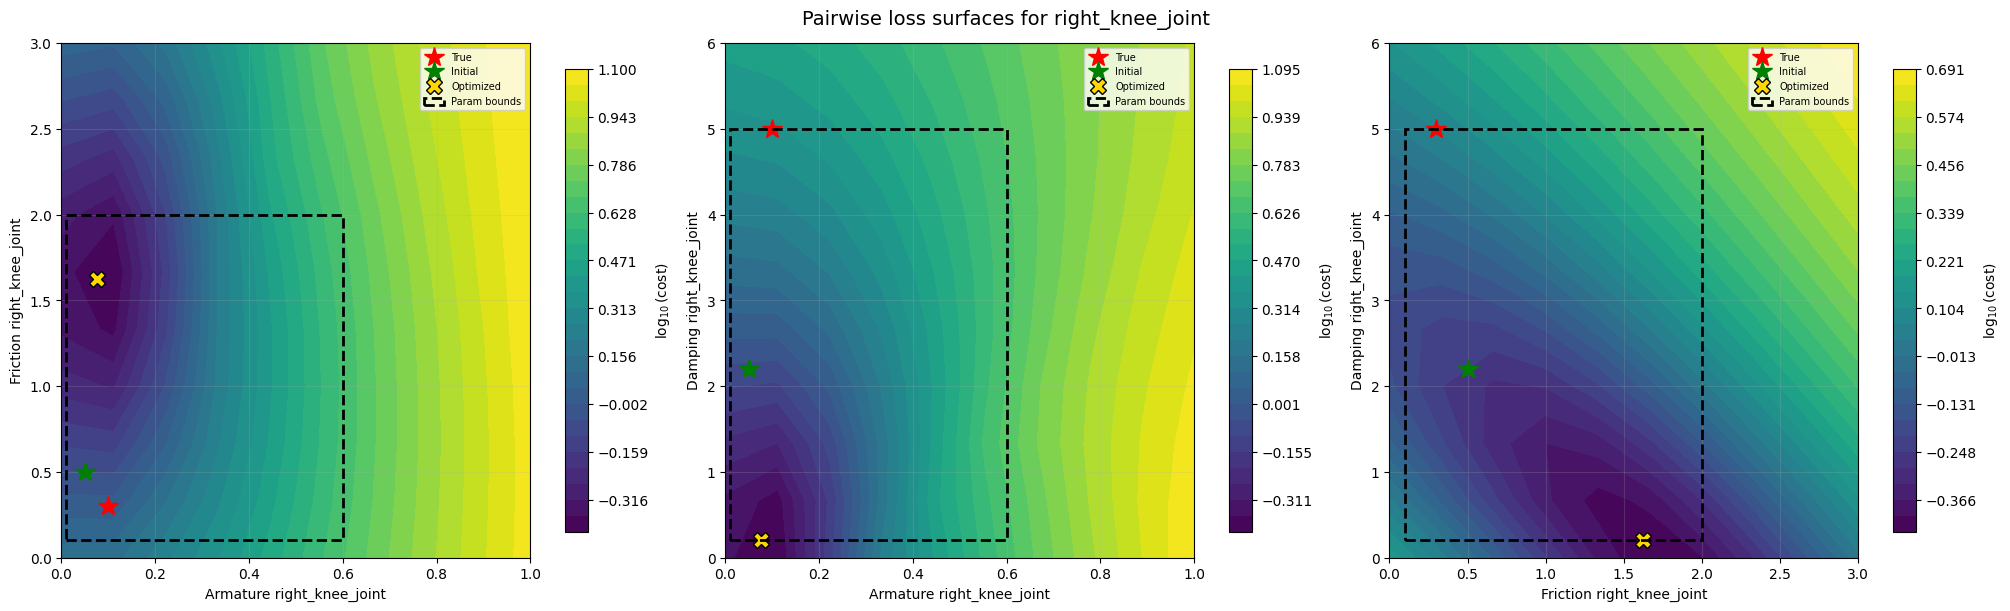

In [9]:
#@title Pairwise loss space contours (arm–fric, arm–damp, fric–damp) { vertical-output: true }
import matplotlib.patches as patches

joint_0 = JOINT_NAMES[0]
name_arm  = f"{joint_0}_armature"
name_fric = f"{joint_0}_friction"
name_damp = f"{joint_0}_damping"

# Wider grids (extend beyond the optimiser bounds)
armature_grid_wide = np.linspace(0.0, 1.0, 10)
friction_grid_wide = np.linspace(0.0, 3.0, 10)
damping_grid_wide  = np.linspace(0.0, 6.0, 10)

# Optimiser bounds (for the black boxes)
arm_lo, arm_hi   = 0.01, 0.6
fric_lo, fric_hi = 0.1,  2.0
damp_lo, damp_hi = 0.2,  5.0

def _eval_grid(residual_fn, params_template, key_x, grid_x, key_y, grid_y):
    cost = np.zeros((len(grid_x), len(grid_y)))
    p = params_template.copy()
    for i, vx in enumerate(grid_x):
        for j, vy in enumerate(grid_y):
            p[key_x].value[:] = vx
            p[key_y].value[:] = vy
            x = p.as_vector()
            res, _, _ = residual_fn(x, p)
            cost[i, j] = sum(np.sum(r**2) for r in res)
    return cost

# Compute three pairwise surfaces
cost_af = _eval_grid(residual_fn, opt_params, name_arm,  armature_grid_wide, name_fric, friction_grid_wide)
cost_ad = _eval_grid(residual_fn, opt_params, name_arm,  armature_grid_wide, name_damp, damping_grid_wide)
cost_fd = _eval_grid(residual_fn, opt_params, name_fric, friction_grid_wide, name_damp, damping_grid_wide)

true_a = TRUE_ARMATURE[joint_0]
true_f = TRUE_FRICTION[joint_0]
true_d = TRUE_DAMPING[joint_0]
init_a = INIT_ARMATURE
init_f = INIT_FRICTION
init_d = INIT_DAMPING
opt_a  = opt_params[name_arm].value[0]
opt_f  = opt_params[name_fric].value[0]
opt_d  = opt_params[name_damp].value[0]

panels = [
    (armature_grid_wide, friction_grid_wide, cost_af,
     f"Armature {joint_0}", f"Friction {joint_0}",
     true_a, true_f, init_a, init_f, opt_a, opt_f,
     arm_lo, arm_hi, fric_lo, fric_hi),
    (armature_grid_wide, damping_grid_wide,  cost_ad,
     f"Armature {joint_0}", f"Damping {joint_0}",
     true_a, true_d, init_a, init_d, opt_a, opt_d,
     arm_lo, arm_hi, damp_lo, damp_hi),
    (friction_grid_wide,  damping_grid_wide,  cost_fd,
     f"Friction {joint_0}", f"Damping {joint_0}",
     true_f, true_d, init_f, init_d, opt_f, opt_d,
     fric_lo, fric_hi, damp_lo, damp_hi),
]

fig, axes = plt.subplots(1, 3, figsize=(20, 6), layout="constrained")
for ax, (gx, gy, cost, xlabel, ylabel,
         tx, ty, ix, iy, ox, oy,
         bx_lo, bx_hi, by_lo, by_hi) in zip(axes, panels):
    X, Y = np.meshgrid(gx, gy)
    log_cost = np.log10(cost + 1e-12)
    levels = np.linspace(log_cost.min(), log_cost.max(), 30)
    cf = ax.contourf(X, Y, log_cost.T, levels=levels, cmap="viridis")

    ax.plot(tx, ty, "r*", markersize=15, label="True", zorder=5)
    ax.plot(ix, iy, "g*", markersize=15, label="Initial", zorder=5)
    ax.plot(ox, oy, marker="X", color="gold", markeredgecolor="k",
            markeredgewidth=1, markersize=12, linestyle="none",
            label="Optimized", zorder=5)

    rect = patches.Rectangle(
        (bx_lo, by_lo), bx_hi - bx_lo, by_hi - by_lo,
        linewidth=2, edgecolor="black", facecolor="none",
        linestyle="--", label="Param bounds", zorder=6,
    )
    ax.add_patch(rect)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.2)
    fig.colorbar(cf, ax=ax, label=r"$\log_{10}$(cost)", shrink=0.9)
    ax.legend(loc="best", fontsize=7)

fig.suptitle(f"Pairwise loss surfaces for {joint_0}", fontsize=14)
plt.show()